In [ ]:
# Data for the chart is in:
# /cluster/work/grlab/projects/projects2019-secedo/datasets/varsim/results/breaking_point/

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib
import numpy as np
import seaborn as sns 

def tick_format(tick, pos):
    print(tick, pos)
    return "bla"

pal = sns.color_palette("magma")

fig, axs = plt.subplots(1, figsize=(12,6))

xfill=[0,30]
y1fill=[0.05,0.05]
y2fill= [0,0]

# 'Rhabdoid tumor', 'Ewing sarcoma', 'Thyroid, AML', 
# cancers=['None', 'Rhabdoid tumor', 'Ewing sarcoma','Prostate', 'Kidney clear cell', 'Ovarian', 'DLBCL', 'Esophageal', 'Cervical', 'Colorectal']
cancers = ['None', 'Ewing sarcoma', 'Medulloblastoma', 'Low-grade glioma', 'Ovarian', 'Cervical', 'Colorectal', 'Bladder', 'Lung\nadenocarcinoma', 'Lung SCC']
#x_ticks=['0.5', '0.75', '1.25', '2.5', '5', '7.5', '10', '15', '20', '30']

x_ticks=[0.5, 0.75, 1.25, 2.5, 5, 7.5, 10, 15, 20, 30]

cov_500_bal=[0.11,0.11,0.08,0.07, 0.05, 0.04, 0.04, 0.031, 0.031, 0.031]

cov_500_imbal=[0.16,0.12,0.12,0.09, 0.08, 0.07, 0.05, 0.04, 0.04, 0.04]

cov_1000_bal=[0.07,0.07,0.06,0.05, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]

axs.plot(x_ticks, cov_500_imbal, label="250/750", marker='o', color=pal[5])
axs.plot(x_ticks, cov_500_bal, label="500/500", marker='o', color=pal[3])
axs.plot(x_ticks, cov_1000_bal, label="1000/1000", marker='o', color=pal[1])



plt.xticks(x_ticks, fontsize=14)
plt.yticks(fontsize=14)

axs.set_ylim([0,0.16])
axs.set_xlim([0.75,30])
axs.set_xscale('log')
axs.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
axs.xaxis.set_minor_locator(ticker.NullLocator())
axs.xaxis.set_ticklabels(x_ticks, rotation=90)
#axs.grid(True)
axs.legend(loc='best', fontsize=14)


plt.fill_between(xfill, y1fill, y2fill, facecolor='blue', alpha=0.05)
plt.xlabel("Number of SNVs (thousands)", fontsize=14)



plt.ylabel("Minimum per-cell coverage", fontsize=14)


twin_axs = axs.twiny()
twin_axs.set_ylim([0,0.125])
twin_axs.set_xlim([0.75,30])


#twin_axs.set_xscale('log')
twin_axs.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
twin_axs.xaxis.set_minor_locator(ticker.NullLocator())
twin_axs.xaxis.set_ticklabels(cancers, rotation=90, fontsize=14)
twin_axs.set_xlabel('Cancer type', fontsize=14)



plt.savefig('/tmp/breaking_point.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [ ]:
# Plot eigenvectors for gradually increasing coverage of the 2.5K/0.05/500/500 dataset

import matplotlib.pyplot as plt
import numpy as np

cov = [3, 4, 5, 7]
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.3)
for i in range(4):
    base_dir = f'/Users/dd/work/svc/data/2.5Ksnp/cov0{cov[i]}x_2.5Ksnp/svc_5_05/'

    data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_norm.csv')

    x1 = data[:500, 1]
    y1 = data[:500, 2]

    x2 = data[500:1000, 1]
    y2 = data[500:1000, 2]

    axs[i//2][i%2].scatter(x1, y1, label='healthy', color='blue', s=1)
    axs[i//2][i%2].scatter(x2, y2, label='tumor', color='red', s=1)

    axs[i//2][i%2].set_aspect(0.5, adjustable='box')
    axs[i//2][i%2].set(xlabel='2nd eigenvector', ylabel='3rd eigenvector')
    if i < 2:
        axs[i//2][i%2].set(xlabel='')
    if i == 1 or i == 3:
        axs[i//2][i%2].set(ylabel='')

    axs[i//2][i%2].title.set_text(f'Coverage 0.0{cov[i]}x')
    #axs[i//2][i%2].set_ylim([-1.2, 1.2])
    #axs[i//2][i%2].set_xlim([-1, 1])
    
plt.savefig('/tmp/eigenvectors.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# Plot eigenvectors for each sub-cluster of the 7500 cell synthetic dataset


import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
cov=5
base_dir = f'/Users/dd/work/svc/data/big/silver_5_01/'

data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_norm.csv')

print(matplotlib.colors.to_hex('blue'))

x1 = data[:2000,1]
y1 = data[:2000,2]

x2 = data[2000:2500,1]
y2 = data[2000:2500,2]

x3 = data[2500:3000,1]
y3 = data[2500:3000,2]

x4 = data[3000:3500,1]
y4 = data[3000:3500,2]

x5 = data[3500:4000,1]
y5 = data[3500:4000,2]

x6 = data[4000:5000,1]
y6 = data[4000:5000,2]

x7 = data[5000:5500,1]
y7 = data[5000:5500,2]

x8 = data[5500:6250,1]
y8 = data[5500:6250,2]

x9 = data[6250:7250,1]
y9 = data[6250:7250,2]

fig, axs = plt.subplots(1, 1, figsize=(15,5))

axs.scatter(x1,y1, label='healthy', color = 'blue')
axs.scatter(x2,y2, label='tumor1', color = 'red')
axs.scatter(x3,y3, label='tumor2', color = 'magenta')
axs.scatter(x4,y4, label='tumor3', color = 'yellow')
axs.scatter(x5,y5, label='tumor4', color = 'green')
axs.scatter(x6,y6, label='tumor5', color = 'purple')
axs.scatter(x7,y7, label='tumor6', color = 'pink')
axs.scatter(x8,y8, label='tumor7', color = 'orange')
axs.scatter(x9,y9, label='tumor8', color = 'cyan')


plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
# axs.legend(loc='upper right')

data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_normA.csv')

x1 = data[:2000,1]
y1 = data[:2000,2]

x2 = data[2000:2500,1]
y2 = data[2000:2500,2]

x3 = data[2500:3000,1]
y3 = data[2500:3000,2]

x8 = data[3000:3750,1]
y8 = data[3000:3750,2]


fig, axs = plt.subplots(1, 1, figsize=(15,5))

axs.scatter(x1,y1, label='healthy', color = 'blue')
axs.scatter(x2,y2, label='tumor1', color = 'red')
axs.scatter(x3,y3, label='tumor2', color = 'magenta')
axs.scatter(x8,y8, label='tumor9', color = 'orange')


plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
# axs.legend(loc='upper right')

data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_normAB.csv')

x2 = data[:500,1]
y2 = data[:500,2]

x3 = data[500:1000,1]
y3 = data[500:1000,2]

x8 = data[1000:1500,1]
y8 = data[1000:1500,2]


fig, axs = plt.subplots(1, 1, figsize=(15,5))

axs.scatter(x2,y2, label='tumor1', color = 'red')
axs.scatter(x3,y3, label='tumor2', color = 'magenta')
axs.scatter(x8,y8, label='tumor9', color = 'orange')


plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
# axs.legend(loc='upper right')


data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_normB.csv')

print(matplotlib.colors.to_hex('blue'))


x4 = data[:500,1]
y4 = data[:500,2]

x5 = data[500:1000,1]
y5 = data[500:1000,2]

x6 = data[1000:2000,1]
y6 = data[1000:2000,2]

x7 = data[2000:2500,1]
y7 = data[2000:2500,2]

x9 = data[2500:3500,1]
y9 = data[2500:3500,2]

fig, axs = plt.subplots(1, 1, figsize=(15,5))

axs.scatter(x4,y4, label='tumor3', color = 'yellow')
axs.scatter(x5,y5, label='tumor4', color = 'green')
axs.scatter(x6,y6, label='tumor5', color = 'purple')
axs.scatter(x7,y7, label='tumor6', color = 'pink')
axs.scatter(x9,y9, label='tumor8', color = 'cyan')


plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_normBB.csv')

print(matplotlib.colors.to_hex('blue'))


x6 = data[:1000,1]
y6 = data[:1000,2]

x9 = data[1000:2000,1]
y9 = data[1000:2000,2]

fig, axs = plt.subplots(1, 1, figsize=(15,5))

axs.scatter(x6,y6, label='tumor5', color = 'purple')
axs.scatter(x9,y9, label='tumor8', color = 'cyan')


plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)



data = np.loadtxt(f'{base_dir}/sim_mat_eigenvectors_normBA.csv')

print(matplotlib.colors.to_hex('blue'))


x4 = data[:500,1]
y4 = data[:500,2]

x5 = data[500:1000,1]
y5 = data[500:1000,2]

x7 = data[1000:1500,1]
y7 = data[1000:1500,2]


fig, axs = plt.subplots(1, 1, figsize=(15,5))

axs.scatter(x4,y4, label='tumor3', color = 'yellow')
axs.scatter(x5,y5, label='tumor4', color = 'green')
axs.scatter(x7,y7, label='tumor6', color = 'pink')


plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

pal = sns.color_palette("tab10")

cloneall=[0.131579, 0.125, 0.1, 0.041667, 0.034483, 0.073171, 0.054945, 0.129032, 0.071429, 0.119048, 0.055944, 0.063291, 0.147059, 0.07619, 0.065789, 0.109375, 0.072581, 0.103448, 0.62069, 0.073171, 0.333333, 0.087719, 0.125, 0.190476, 0.121212, 0.130435, 0.071429, 0.074074, 0.085714, 0.153846, 0.122449, 0.243243, 0.193548, 0.079365, 0.173913, 0.238095, 0.145455, 0.184211, 0.076923, 0.057692, 0.053571, 0.053333, 0.101449, 0.09375, 0.101695, 0.119048, 0.075472, 0.096774, 0.090909]
clone159=[0.192308, 0.166667, 0.166667, 0.333333, 0.190476, 0.095238, 0.185185, 0.085714, 0.075, 0.307692, 0.142857, 0.093333, 0.088235, 0.222222, 0.132075, 0.075, 0.193548, 0.067568, 0.2, 1, 0.5, 0.166667, 0.15625, 0.142857, 0.6, 0.5, 0.166667, 0.16, 0.16, 0.121212, 0.125, 0.1875, 0.263158, 0.172414, 0.666667, 0.15, 0.230769, 0.384615, 0.2, 0.137931, 0.190476, 0.242424, 0.25, 0.148148, 0.115385, 0.157895, 0.090909, 0.277778, 0.083333, 0.241379, 0.090909, 0.066667, 0.083333, 0.096774, 0.194444, 0.153846, 0.25, 0.115385, 0.078947, 0.12766, 0.085714, 0.217391, 0.25]
clone118=[0.25, 0.333333, 0.333333, 1, 0.333333, 0.285714, 0.375, 0.666667, 0.363636, 0.333333, 0.25, 0.285714, 0.4, 1, 0.5, 0.4, 0.333333, ]

clones_all = []

for name in ['all', '118', '159']:
    clones = [ float(line[:-1]) for line in open(f'/Users/dd/work/secedo/data/clone{name}_allelic_factor') ]
    print(clones[0:10])
    clones_all.append(clones)


bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
# bins=[b-0.05 for b in bins]
fig, axs = plt.subplots(1, 1, figsize=(9,6))
plt.hist(clones_all,  bins=10, range=(0,1), density=False, alpha=0.8, label=["All cells", "Clone 118", "Clone 159"], color=pal[:3])
plt.legend(loc='upper right')
xticks=[f+0.05 for f in bins]
plt.xticks(xticks, rotation='45')
xlabels = [f'[{b}-{(float(b) + 0.1):2.1f})' for b in bins]
xlabels[-1]=''
axs.set_xticklabels(xlabels)
plt.xlim(0,1)
plt.xlabel("Allelic ratio")
plt.savefig('/tmp/slice_B_allelic_factor.png', format='png', bbox_inches='tight')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


fig, axs = plt.subplots(1, figsize=(9,6))

pal = sns.color_palette("tab10")
data = [8976, 7290, 11907, 18091]

axs.bar(['All cells', 'Clone 118','Clone 159','Clone 118+159'], data, color=pal, alpha = 0.8)
plt.ylabel("Dected SNVs")
plt.savefig('/tmp/slice_B_SNVs.png', format='png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.ticker as mtick


coverage=[1014752,1006299,958746,904208,864253,837527,825867,827210,838688,869513,916781,982347,1072587,1188905,1342358,1541778,1802320,2137936,2569702,3110805,3788119,4609821,5621121,6797565,8176892,9746850,11531729,13506754,15669271,18011568,20515126,23151297,25889516,28705409,31557615,34424728,37234851,39946818,42492553,44850767,46929283,48719337,50161349,51203359,51820221,52016783,51760108,51112835,50026672,48575928,46804882,44733670,42430458,39961043,37353963,34659132,31933418,29243253,26573862,24014147,21565563,19258967,17091423,15089750,13253870,11585040,10079037,8731591,7525732,6471982,5543972,4737167,4041841,3439340,2919759,2480939,2107482,1788342,1518280,1296472,1108138,949454,816759,706288,615959,540196,477388,424415,380897,345209,313435,287323,266040,247140,230599,217049,205967,194903,185415,177231,169622,162980,155433,150159,144051,140088,135254,130309,125917,121456,117619,114662,110181,106010,102845,99835,96865,93632,90822,88468,85458,82897,80208,78151,75559,73488,71205,69440,67352,65223,63571,61991,60418,58870,57066,55524,54693,53476,51633,50650,49798,48320,47266,46421,45617,44503,42941,42281,41470,40614,39118,38963,37850,37133,36397,35546,34924,33853,33323,32899,32124,31062,30547,29858,29518,28934,28124,27917,27019,26266,25901,25282,24841,24243,23557,23182,22805,22309,21736,21302,20589,20523,19608,19330,19391,18629,18357,17648,17532,17331,17051,16381,16222,15991,15615,15278,14844,14468,14362]
x_vals=range(0, len(coverage))

poisson_cov = [poisson.pmf(x, 45)*100 for x in range(0, len(coverage))]

sum_c = sum(coverage)

coverage_norm = [x*100/sum_c for x in coverage]

fig, axs = plt.subplots(1, 2, figsize=(18,6))

axs[0].fill(x_vals, coverage_norm, color='#5891ad', label="Coverage histogram")
axs[0].plot(x_vals, poisson_cov, color='red', label="Poission distribution")

axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

axs[0].grid(True)
#axs[0].legend(loc='best', fontsize=14)

axs[0].set_ylim([0,6])
axs[0].set_xlim([0,100])

axs[0].set_xlabel("Per-site coverage")
axs[0].set_ylabel("Percentage of loci")

per_site=[3550834719891, 66943909616, 1332525037]
sum_site = sum(per_site)
mean = ((66943909616*1 + 1332525037*2)/sum_site)
per_site = [x*100/sum_site for x in per_site]
axs[1].bar([0,1,2], per_site, color='#5891ad', label="Coverage per locus for individual cells")
axs[1].set_xticks([0,1,2])
axs[1].set_xlabel("Per-site coverage")
axs[1].set_ylabel("Percentage of loci")
axs[1].grid(True)
axs[1].set_ylim([0,100])


poisson_cov = [poisson.pmf(x, mean)*100 for x in [0,1,2]]

axs[1].plot([0,1,2], poisson_cov, color='red', label="Poission distribution")
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())
#axs[1].legend(loc='best', fontsize=14)

plt.savefig('/tmp/10x_breast_coverage.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
# Plot the SBMClone ARI scores vs the Secedo ARI scores for the breast cancer dataset

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns


def tick_format(tick, pos):
    print(tick, pos)
    return "bla"


pal = sns.color_palette("magma")

fig, axs = plt.subplots(1, figsize=(9, 6))

xfill = [0, .05]
y1fill = [-0.02, 0]
y2fill = [1, 1]

x_ticks = [0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3]

sbm_clone_all = [-0.0001, -6.321868604628362e-05, 0.3226, 0.4066, 0.6202, 0.5193, 0.704, 0.7150, 0.7021, 0.6996]
sbm_clone_B = [0,0,0,0,0,-0.0031,-0.0031,-0.0031,-0.0031,-0.0091]

secedo_all = [0.659, 0.692, 0.698, 0.709, 0.714, 0.714, 0.712, 0.72, 0.723, 0.722]
secedo_B = [0.586, 0.615, 0.632, 0.643, 0.573, 0.590, 0.65, 0.652, 0.650, 0.656]

axs.plot(x_ticks, sbm_clone_all, label="SBMClone All", marker='v', color=pal[5], markersize=10)
axs.plot(x_ticks, secedo_all, label="Secedo All", marker='v', color=pal[3], markersize=10)
axs.plot(x_ticks, sbm_clone_B, label="SBMClone Slice B", marker='o', color=pal[5], markersize=10)
axs.plot(x_ticks, secedo_B, label="Secedo Slice B", marker='o', color=pal[3], markersize=10)

plt.xticks(x_ticks, fontsize=14)
plt.yticks(fontsize=14)

axs.set_ylim([-0.02, 1])
axs.set_xlim([0, 0.3])
axs.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
axs.xaxis.set_minor_locator(ticker.NullLocator())
axs.xaxis.set_ticklabels(x_ticks) #, rotation=90)
#axs.grid(True)
axs.legend(loc='best', fontsize=14)

plt.fill_between(xfill, y1fill, y2fill, facecolor='blue', alpha=0.05)
plt.xlabel("Avg. per-cell coverage", fontsize=14)

plt.ylabel("ARI Score", fontsize=14)

plt.savefig('/tmp/sbm_clone_compare.pdf', format='pdf', bbox_inches='tight')

plt.show()







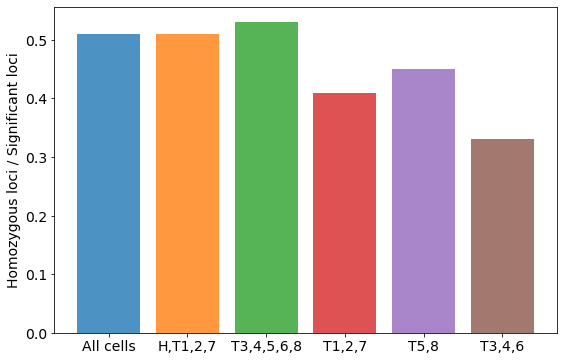

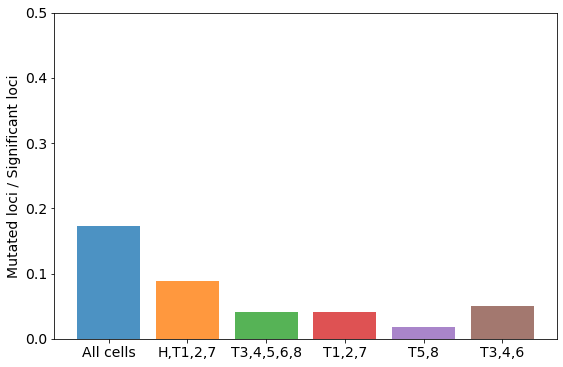

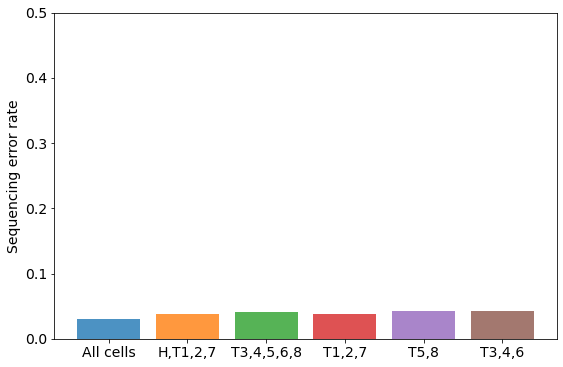

In [5]:
# plot theta, epsilon and h as estimated at each clustering step on the synthetic dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



fig, axs = plt.subplots(1, figsize=(9,6))

pal = sns.color_palette("tab10")
homo_ratio = [0.51, 0.51, 0.53, 0.41, 0.45, 0.33]
hetero_ratio = [0.31, 0.39, 0.42, 0.53, 0.52, 0.61]
mutated_ratio=[0.1724322487864586, 0.08868320801549275, 0.041354160117128204, 0.041101686671984126, 0.018530340842197773, 0.05008083069788016]
error_ratio=[0.03, 0.03761755485893417, 0.04159132007233273, 0.037567504108945764, 0.042624042624042624, 0.04266558309630231]
labels = ['All cells', 'H,T1,2,7','T3,4,5,6,8','T1,2,7', 'T5,8', 'T3,4,6']

 
axs.bar(labels, homo_ratio, color=pal, alpha = 0.8)
plt.ylabel("Homozygous loci / Significant loci", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/tmp/homozygous_loci.png', format='png', bbox_inches='tight')


fig, axs = plt.subplots(1, figsize=(9,6)) 
axs.bar(labels, mutated_ratio, color=pal, alpha = 0.8)
plt.ylabel("Mutated loci / Significant loci", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,0.5])
plt.savefig('/tmp/mutated_loci.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(1, figsize=(9,6)) 
axs.bar(labels, error_ratio, color=pal, alpha = 0.8)
plt.ylabel("Sequencing error rate", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,0.5])
plt.savefig('/tmp/seq_error_rate.png', format='png', bbox_inches='tight')




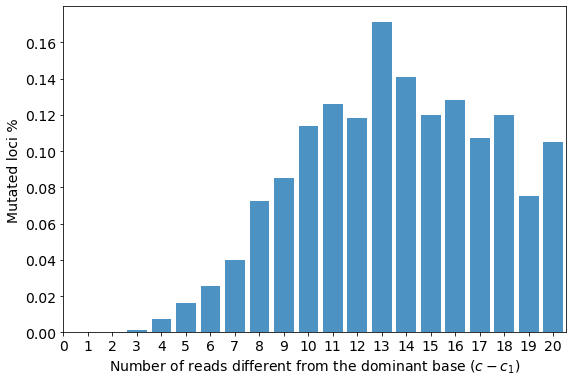

In [6]:
# plot the percentage of mutated loci for various values of c-c1
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


num_pos = 21

fig, axs = plt.subplots(1, figsize=(9,6))

pal = sns.color_palette("tab10")
all_loci=[0, 0, 0, 11666, 3320, 2566, 2094, 1803, 1489, 1337, 1123, 985, 821, 636, 610, 467, 445, 372, 309, 266, 229, 232, 186, 159, 144, 114, 109, 88, 98, 95, 69, 66, 59, 70, 53, 56, 58, 61, 64, 50]
mutated_loci=[0, 0, 0, 15, 24, 41, 54, 72, 108, 114, 128, 124, 97, 109, 86, 56, 57, 40, 37, 20, 24, 17, 22, 9, 19, 7, 10, 6, 6, 3, 6, 8, 1, 4, 9, 9, 5, 6, 13, 10]
ratios=[m/a if a!=0 else 0 for (m,a) in zip(mutated_loci, all_loci)][:num_pos]
labels = range(num_pos)

 
axs.bar(labels, ratios, color=pal[0], alpha = 0.8)
plt.ylabel("Mutated loci %", fontsize=14)
plt.xlabel("Number of reads different from the dominant base ($c-c_1$)", fontsize=14)
axs.set_xlim([0,20.5])
plt.xticks(range(num_pos), fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/tmp/mutated_loci_by_diff.png', format='png', bbox_inches='tight')